## 6.4 Homework

### 6.4.1 Try to find a way to deal with the noisy data and give your reasoning.
find data, calculate derivative, and then find a way to deal with noisy data and smooth out the graph.

### 6.4.2 Heat capacity of a solid
Debye's thory of solids gives the heat capacity of a solid at temperature $T$ to be

$$C_V = 9V\rho k_B (\frac{T}{\theta_D})^3 \int_0^{\theta_D/T} \frac{x^4e^x}{(e^x-1)^2}dx$$

where $V$ is the volume of the solid, $\rho$ is the density of atoms, $k_B$ is Boltzmann constant, and $\theta$ is the Debye temperature.

- Write a program to calculate $C_V$ for a given value of $T$ for a sample of 1000 $cm^3$ of aluminum, in which the density $\rho$ is 6.022 $\times 10^{28} m^3$ and $\theta_D$ = 428 K. 

- Choose at least one way to do the integral from the followings
     - Simpson or trapezoid rule by yourself
     - one built-function from scipy

- Plot $C_V$ as a function of temperature from $T$ = 5 K to $T$ = 500 K.

25.77414739579257


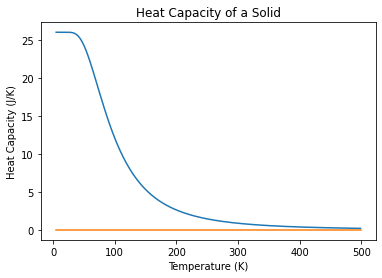

In [7]:
#This code is for problem 6.4.2

import scipy.integrate as integrate
import matplotlib.pyplot as plt
import numpy as np


def integration(v, p, temp, theta):
    """
    This function calculates the integral of a function.
    Args:
        v = volume
        p = density
        temp = temperature
        theta = Debye temperature
        returns area under the curve
    """
    k_b = 1.380649e-23 #boltzmann constant
    f = lambda x: (x**4)*np.exp(x)/((np.exp(x)-1)**2)

    constant = 9 * v * p * k_b * (temp/theta)**3
    
    result = integrate.quad(f, 0, theta/temp)

    return result

"""c_v takes the absolute value of the difference between the areas under 
   each curve evaulated from 0 to 5 and from 0 to 500."""
c_v = abs(integration(0.001, 6.022e28, 500, 428)[0] - integration(0.001, 6.022e28, 5, 428)[0])

print(c_v)

cv = []
i = 0
T = range(5, 500)

for i in range(len(T)): #runs from all values between 5 and 500
    cv.append(integration(0.001, 6.022e28, T[i], 428))
    
    
plt.plot(T, cv)

plt.xlabel('Temperature (K)')
plt.ylabel('Heat Capacity (J/K)')
plt.title('Heat Capacity of a Solid')

plt.show()
